In [19]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import time
import math

# 5_1 section

In [20]:
#define a read data and create a dict of numpy array with feature name the fist row of the txt file
def read_data(file_name):
    data = np.genfromtxt(file_name, delimiter = '\t', skip_header = 0, names = True)
    return data

#read data from txt file
data_light = read_data('arisi_cufino_5_1.txt')
#print the headers
print(data_light.dtype.names)

('lambdanm', 'DC', 'C1')


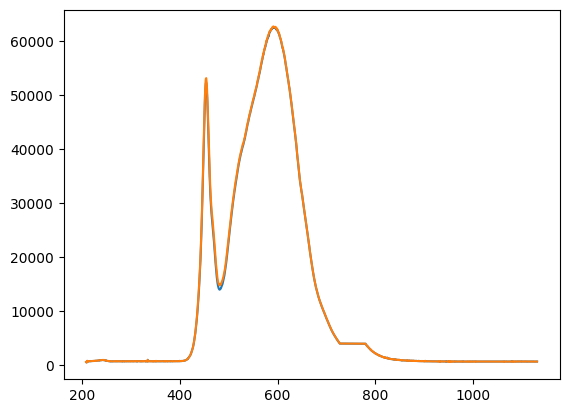

In [21]:
#plot the data
plt.figure()

plt.plot(data_light['lambdanm'], data_light['DC'], label = 'DC')
plt.plot(data_light['lambdanm'], data_light['C1'], label = 'C1')
plt.show()

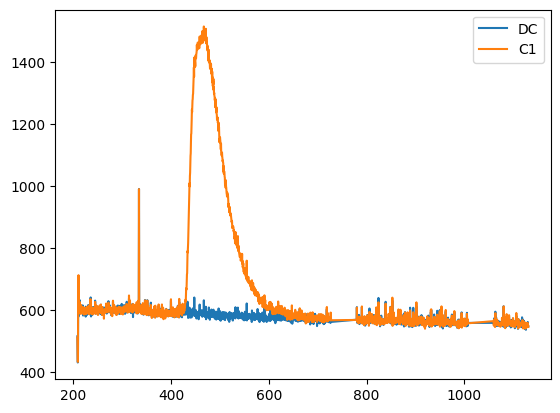

In [67]:
#read dark data
data_dark = read_data('arisi_cufino_5_1_dark.txt')

#plot the data
plt.figure()
plt.plot(data_dark['lambdanm'], data_dark['DC'], label = 'DC')
plt.plot(data_dark['lambdanm'], data_dark['C1'], label = 'C1')
plt.legend()
plt.show()


# 5_2 section

In [23]:
#read data from txt file
data_52 = read_data('arisi_cufino_5_2/Attenuation_h=14deg_v=10deg_x=0mm.txt')
#print the headers
print(data_52.dtype.names)

('lambdanm', 'C1')


1458.6


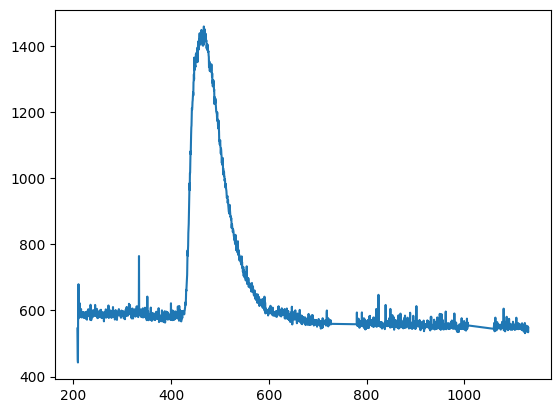

In [24]:
#plot the data
plt.figure()

plt.plot(data_52['lambdanm'], data_52['C1'], label = 'C1')
#take the maximum value of the C1 array
max_C1 = np.max(data_52['C1'])
print(max_C1)

In [25]:
l = []
f_attenuation = 'arisi_cufino_5_2/Attenuation_h=14deg_v=10deg_x=0mm.txt'

h = []
v = []
x = []

if f_attenuation.endswith('.txt'):
    l = f_attenuation.split('.txt')[0].split("Attenuation_")[1]
    print(l)
    #split the string in the list and save the numbers in the list
    h = l.split('h=')[1].split('deg')[0]
    v = l.split('v=')[1].split('deg')[0]
    x = l.split('x=')[1].split('mm')[0]
    print(h)
    print(v)
    print(x)


h=14deg_v=10deg_x=0mm
14
10
0


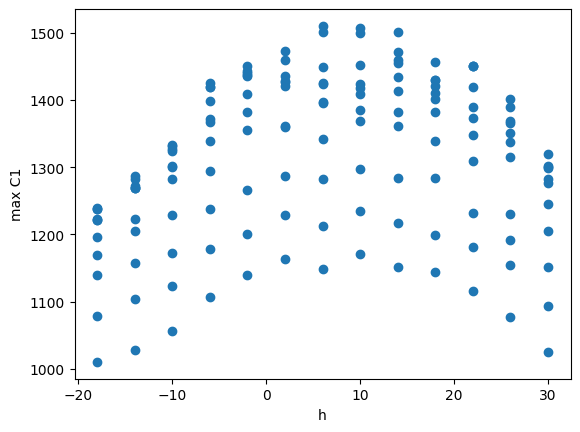

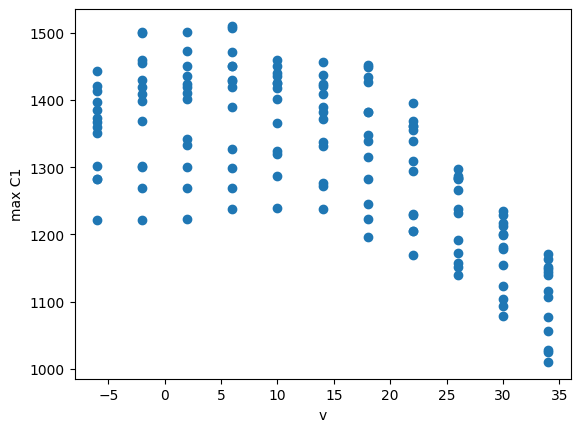

In [26]:
# do the same fo all the file in the folder and save the maximum value of the C1 array in a list
# and the h, v and x values in other lists
max_C1 = []
h = []
v = []
x = []

for file in os.listdir('arisi_cufino_5_2'):
    if file.endswith('.txt'):
        #if in the name there is "Attenuation"
        if "Attenuation" in file:
            data = read_data('arisi_cufino_5_2/'+file)
            max_C1.append(np.max(data['C1']))
            l = file.split('.txt')[0].split("Attenuation_")[1]
            h.append(l.split('h=')[1].split('deg')[0])
            v.append(l.split('v=')[1].split('deg')[0])
            x.append(l.split('x=')[1].split('mm')[0])

#now order the data in h and v 
#convert the list in numpy array
max_C1 = np.array(max_C1)
h = np.array(h)
v = np.array(v)
x = np.array(x)

#convert the string in float
h = h.astype(float)
v = v.astype(float)
x = x.astype(float)
max_C1 = max_C1.astype(float)       


#plot the data h vs max_C1
plt.figure()
plt.plot(h, max_C1, 'o')
plt.xlabel('h')
plt.ylabel('max C1')
plt.show()

#plot the data v vs max_C1
plt.figure()
plt.plot(v, max_C1, 'o')
plt.xlabel('v')
plt.ylabel('max C1')
plt.show()

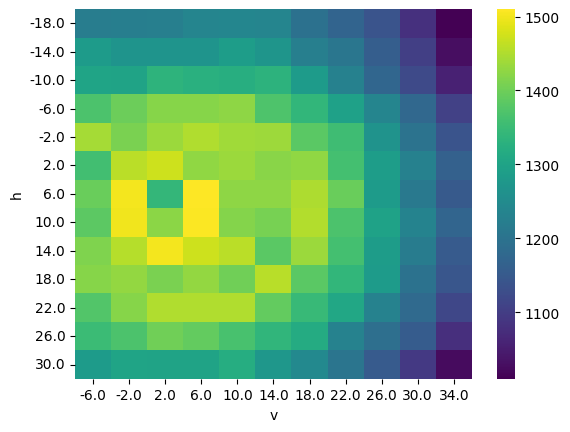

In [27]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'h': h, 'v': v, 'max_C1': max_C1})
df = df.pivot(index='h', columns='v', values='max_C1')
sns.heatmap(df, cmap='viridis')
plt.show()


## 5.3 section: Simulation

Attenot to speed up the process.... still not enough

In [28]:
# import numpy as np
# import os
# from concurrent.futures import ThreadPoolExecutor

# def read_file(file):
#     column_data = {}
#     with open(file, 'r') as f:
#         lines = f.readlines()
#         # Extract column names from the first line
#         column_names = lines[0].strip().split('\t')
#         # Remove the # from the first column name
#         column_names[0] = column_names[0].split('# ')[1]

#         # Initialize lists for each column
#         for name in column_names:
#             column_data[name] = []

#         # Read data for each column
#         for line in lines[1:]:
#             values = line.strip().split('\t')
#             for i, value in enumerate(values):
#                 column_data[column_names[i]].append(float(value))

#     return column_data

# def read_txt_files(files):
#     data_dict = {}
#     with ThreadPoolExecutor() as executor:
#         futures = {executor.submit(read_file, file): file for file in files}
#         for future in futures:
#             file = futures[future]
#             try:
#                 result = future.result()
#                 for name, data in result.items():
#                     if name not in data_dict:
#                         data_dict[name] = np.array(data)
#                     else:
#                         data_dict[name] = np.concatenate((data_dict[name], np.array(data)))
#             except Exception as e:
#                 print(f"An error occurred while processing file {file}: {e}")
#     return data_dict

# list_files = [os.path.join('lab simul', file) for file in os.listdir('lab simul') if file.endswith('.txt')]

# sim_dict = read_txt_files(list_files)

# print(sim_dict.keys())
# print(len(sim_dict['px_start']))


This is working but it is too slow. I will try to speed up the process by using a different approach. (~1minute and 30 seconds)

In [29]:
import numpy as np

def read_txt_file(files):
    data_dict = {}
    for file in files:
        with open(file, 'r') as f:
            lines = f.readlines()
            # Extract column names from the first line
            column_names = lines[0].strip().split('\t')
            # Remove the # from the first column name
            column_names[0] = column_names[0].split('# ')[1]

            # Initialize lists for each column
            for name in column_names:
                if name not in data_dict:
                    data_dict[name] = []

            # Read data for each column and for each file
            for line in lines[1:]:
                values = line.strip().split('\t')
                for i, value in enumerate(values):
                    data_dict[column_names[i]].append(float(value))
        print(files.index(file) / len(files) * 100)
    # Convert lists to numpy arrays
    for name in data_dict:
        data_dict[name] = np.array(data_dict[name])

    return data_dict

list_files = []
for file in os.listdir('lab simul'):
    if file.endswith('.txt'):
        list_files.append('lab simul/' + file)

sim_dict = read_txt_file(list_files)
print(sim_dict.keys())
print(len(sim_dict['px_start']))


0.0
0.08333333333333334
0.16666666666666669
0.25
0.33333333333333337
0.4166666666666667
0.5
0.5833333333333334
0.6666666666666667
0.75
0.8333333333333334
0.9166666666666666
1.0
1.0833333333333335
1.1666666666666667
1.25
1.3333333333333335
1.4166666666666665
1.5
1.5833333333333335
1.6666666666666667
1.7500000000000002
1.8333333333333333
1.9166666666666665
2.0
2.083333333333333
2.166666666666667
2.25
2.3333333333333335
2.4166666666666665
2.5
2.5833333333333335
2.666666666666667
2.75
2.833333333333333
2.9166666666666665
3.0
3.0833333333333335
3.166666666666667
3.25
3.3333333333333335
3.4166666666666665
3.5000000000000004
3.5833333333333335
3.6666666666666665
3.75
3.833333333333333
3.916666666666667
4.0
4.083333333333333
4.166666666666666
4.25
4.333333333333334
4.416666666666667
4.5
4.583333333333333
4.666666666666667
4.75
4.833333333333333
4.916666666666666
5.0
5.083333333333333
5.166666666666667
5.25
5.333333333333334
5.416666666666667
5.5
5.583333333333333
5.666666666666666
5.75
5.83333

In [45]:
sim_dict

{'y_exit': array([ 0.049168  , -0.0795673 , -0.022441  , ...,  0.05211905,
         0.06402657, -0.13463685]),
 'z_exit': array([ 0.01455909, -0.03870329, -0.08241478, ..., -0.02880714,
        -0.211183  ,  0.11928696]),
 'x_start': array([1999.94677734, 2000.03851318, 1999.98626709, ..., 1500.0059967 ,
        1500.15216064, 1500.10472107]),
 'y_start': array([-0.03146193, -0.08594079, -0.00728307, ...,  0.05197242,
         0.04421506, -0.11078155]),
 'z_start': array([ 0.06121081,  0.03534988,  0.07708284, ...,  0.01349527,
        -0.17167313,  0.10930002]),
 'px_start': array([0.90272981, 0.95305747, 0.91016984, ..., 0.97301155, 0.95554024,
        0.97146904]),
 'py_start': array([-0.332766  , -0.12885334, -0.41423482, ..., -0.00788396,
        -0.29474354, -0.20765086]),
 'pz_start': array([0.27266407, 0.27400422, 0.00063896, ..., 0.23062158, 0.00831091,
        0.11458194]),
 'reflCoCl': array([   0., 3516., 5799., ..., 1839., 2216., 2255.]),
 'reflClCl': array([3937.,    0., 

In [73]:
# print(sim_dict['reflCoCl'][0],sim_dict['reflClCl'][0])
print(np.logical_and(sim_dict['reflCoCl'] > 0.5, sim_dict['reflClCl'] > 0.5).sum()) 

115061


In [74]:
#divide the dataset in core and cladding using 'reflCoCl', 'reflClCl'. If the value of 
core_p = {}
clad_p = {}

#if reflCoCl > 0 and reflClCl = 0, the point is in the core
for key in sim_dict:
    core_p[key] = sim_dict[key][(sim_dict['reflCoCl'] > sim_dict['reflClCl'])]
    clad_p[key] = sim_dict[key][(sim_dict['reflClCl'] > sim_dict['reflCoCl'])]

Computation fo the angle for each job

In [75]:
sim_dict['theta'] = np.arccos(sim_dict['px_start'])
core_p['theta'] = np.arccos(core_p['px_start'])
clad_p['theta'] = np.arccos(clad_p['px_start'])


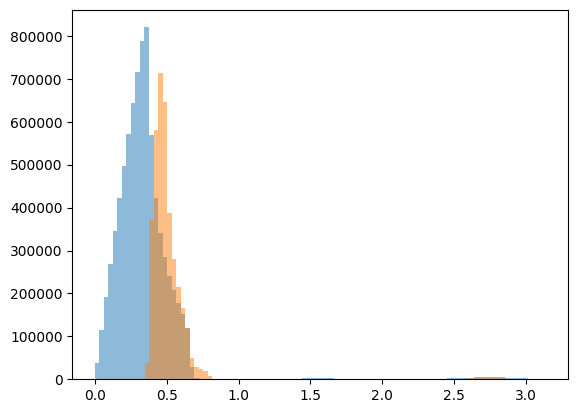

In [76]:
#plot thetas
plt.figure()
plt.hist(core_p['theta'], bins=100, alpha=0.5, label='Core');
plt.hist(clad_p['theta'], bins=100, alpha=0.5, label='Cladding');

In [64]:
# sim_dict['r_min'] = np.abs((sim_dict['pz_start'] * sim_dict['y_start'] + sim_dict['py_start'] * sim_dict['z_start'])/(np.sqrt(sim_dict['pz_start']**2 + sim_dict['py_start']**2)))
core_p['r_min'] = np.abs((core_p['pz_start'] * core_p['y_start'] + core_p['py_start'] * core_p['z_start'])/(np.sqrt(core_p['pz_start']**2 + core_p['py_start']**2)))
clad_p['r_min'] = np.abs((clad_p['pz_start'] * clad_p['y_start'] + clad_p['py_start'] * clad_p['z_start'])/(np.sqrt(clad_p['pz_start']**2 + clad_p['py_start']**2)))


Apply the cut

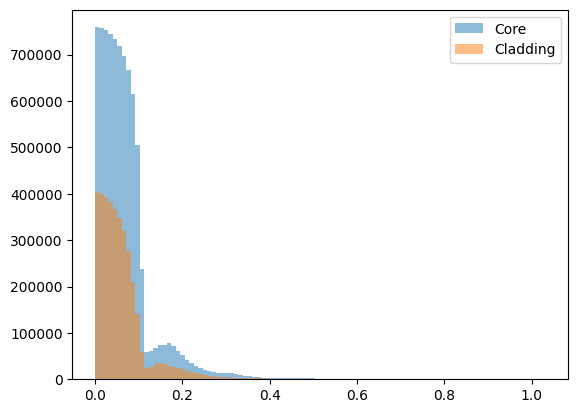

In [77]:
plt.hist(core_p['r_min'], bins=100, alpha=0.5, label='Core');
plt.hist(clad_p['r_min'], bins=100, alpha=0.5, label='Cladding');
plt.legend()

In [66]:
print("BEFORE", len(core_p['r_min']))
print("BEFORE", len(clad_p['r_min']))
print("------")

# core_p['r_min'] = core_p['r_min'][core_p['r_min'] < 0.2]
# clad_p['r_min'] = clad_p['r_min'][clad_p['r_min'] < 0.2]

print("AFTER", len(core_p['r_min']))



BEFORE 8171850
BEFORE 3751033
AFTER 11807972
------


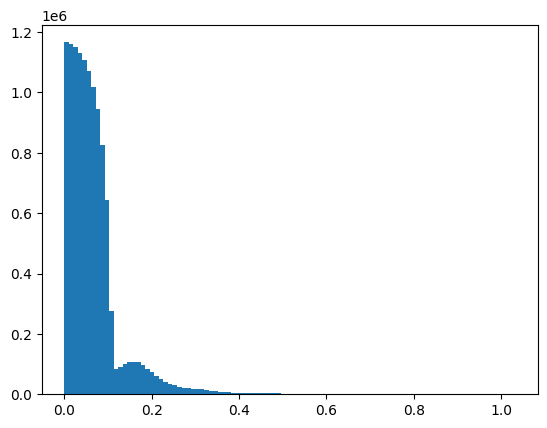

In [58]:
plt.hist(sim_dict['r_min'], bins=100);

(array([3.876400e+04, 1.158080e+05, 1.931870e+05, 2.703410e+05,
        3.465330e+05, 4.223330e+05, 4.981230e+05, 5.717930e+05,
        6.445430e+05, 7.162020e+05, 7.885090e+05, 8.565960e+05,
        9.392580e+05, 1.002818e+06, 1.056239e+06, 9.313670e+05,
        6.298430e+05, 4.889220e+05, 3.936230e+05, 3.180650e+05,
        2.383130e+05, 7.873600e+04, 2.964200e+04, 2.507600e+04,
        1.992400e+04, 8.620000e+03, 1.854000e+03, 1.745000e+03,
        1.551000e+03, 1.526000e+03, 1.337000e+03, 1.299000e+03,
        1.277000e+03, 1.117000e+03, 1.133000e+03, 1.135000e+03,
        1.153000e+03, 1.169000e+03, 1.174000e+03, 1.205000e+03,
        1.174000e+03, 1.297000e+03, 1.268000e+03, 1.457000e+03,
        1.561000e+03, 1.576000e+03, 1.895000e+03, 2.057000e+03,
        2.291000e+03, 2.635000e+03, 2.581000e+03, 2.183000e+03,
        1.930000e+03, 1.649000e+03, 1.526000e+03, 1.424000e+03,
        1.285000e+03, 1.189000e+03, 1.181000e+03, 1.116000e+03,
        1.137000e+03, 1.044000e+03, 9.55

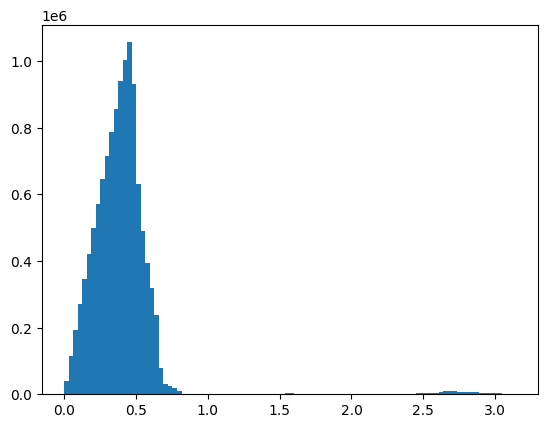

In [59]:
#plot angle
plt.hist(sim_dict['theta'], bins=100)

In [38]:
sim_dict.keys()

dict_keys(['y_exit', 'z_exit', 'x_start', 'y_start', 'z_start', 'px_start', 'py_start', 'pz_start', 'reflCoCl', 'reflClCl', 'wl', 'gpsPosX', 'length_core', 'length_clad', 'rayleighScatterings', 'theta', 'r_min'])

In [41]:
for i in range(10): 
    print(sim_dict['reflCoCl'][i], sim_dict['reflClCl'][i])

0.0 3937.0
3516.0 0.0
5799.0 0.0
2193.0 0.0
0.0 3992.0
2313.0 0.0
3000.0 0.0
3953.0 0.0
4826.0 0.0
3417.0 0.0
